# <center><font color=navy>Data Science for Quantitative Finance</font></center>
## <center><font color=navy>Schools of Thought in Financial Modeling</font> </center>
### <center> Ali Habibnia</center>

    
<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
<center> habibnia@vt.edu </center> 


Financial modeling, a key component of both academic research and practical applications in finance, can generally be categorized into two main approaches. These schools of thought reflect different philosophies on how markets operate and how financial variables should be modeled and predicted.

### 1. **Mathematical Modeling**
Mathematical modeling in finance relies heavily on concepts from stochastic calculus and simulation techniques. This approach is grounded in the idea that financial markets are inherently random, and future price movements cannot be predicted with certainty based on historical data. The mathematical models often focus on creating frameworks to represent the evolution of asset prices over time, typically assuming that prices follow a stochastic process, such as a Brownian motion or geometric Brownian motion.

A classic example of this approach is the Black-Scholes model for option pricing, which uses stochastic differential equations to model the dynamics of asset prices and derive a closed-form solution for the price of options. In this school of thought, the focus is on risk management and derivative pricing, often under the assumption that markets are efficient and any available information is already reflected in current prices. As such, it posits that trying to predict future price movements from historical data alone is futile, as the market is not predictable in a deterministic way.


#### Simulating Asset Prices Using a Stochastic Approach

One popular method for simulating asset prices in financial modeling is the **Geometric Brownian Motion (GBM)** model. This model assumes that asset prices follow a continuous-time stochastic process, where the change in asset prices is driven by both a deterministic trend (drift) and a random component (volatility).

The formula for the Geometric Brownian Motion is:

$$
dS_t = \mu S_t dt + \sigma S_t dW_t
$$

Where:
- $S_t$ is the asset price at time $t$,
- $\mu$ is the drift rate (expected return),
- $\sigma$ is the volatility of the asset,
- $dW_t$ is a Wiener process (random shock).

Below is an example using Python to simulate asset prices based on the GBM model. The simulation starts with an initial asset price, applies a drift (expected return), and adds randomness (volatility) to simulate the asset's evolution over time.

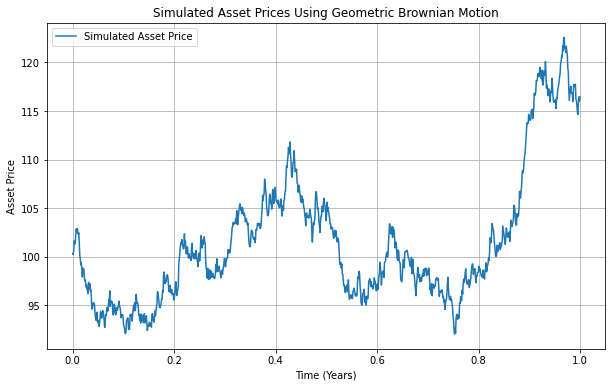

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the GBM model
S0 = 100  # initial asset price
mu = 0.05  # drift (expected return)
sigma = 0.2  # volatility
T = 1.0  # time horizon (in years)
N = 1000  # number of time steps
dt = T / N  # time step
np.random.seed(42)  # for reproducibility

# Simulating the asset price paths
t = np.linspace(0, T, N)
W = np.random.standard_normal(size=N)  # Wiener process increments
W = np.cumsum(W) * np.sqrt(dt)  # cumulative sum to simulate the random walk
S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)  # GBM formula

# Plotting the simulated asset price path
plt.figure(figsize=(10, 6))
plt.plot(t, S, label="Simulated Asset Price")
plt.title('Simulated Asset Prices Using Geometric Brownian Motion')
plt.xlabel('Time (Years)')
plt.ylabel('Asset Price')
plt.grid(True)
plt.legend()
plt.show()

- **Initial asset price ($S_0$)**: We start with an initial price of 100.
- **Drift ($\mu$)**: The expected return is set to 5% per year.
- **Volatility ($\sigma$)**: We assume a volatility of 20%.
- **Time horizon**: We simulate the asset price over 1 year.
- **Time steps ($N$)**: The time horizon is divided into 1000 small time steps to capture the stochastic process.
- The Wiener process ($W_t$) is generated by sampling random shocks and taking the cumulative sum.
- The GBM model is then applied to calculate the asset price at each time step.
- Finally, the simulated asset price is plotted over time.

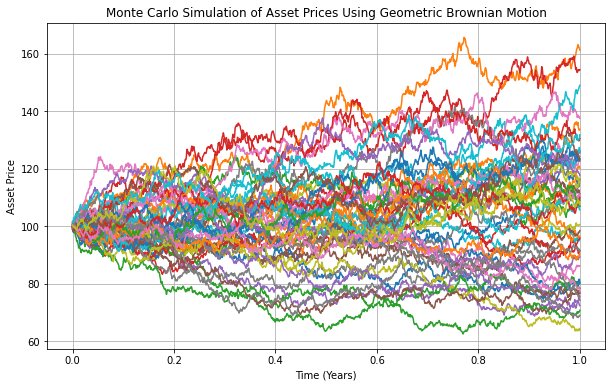

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the GBM model
S0 = 100  # initial asset price
mu = 0.05  # drift (expected return)
sigma = 0.2  # volatility
T = 1.0  # time horizon (in years)
N = 1000  # number of time steps
M = 50  # number of simulations
dt = T / N  # time step
np.random.seed(42)  # for reproducibility

# Simulating M paths of the asset price
t = np.linspace(0, T, N)  # time array
S = np.zeros((M, N))  # matrix to store asset prices
S[:, 0] = S0  # initial price for all simulations

# Simulate each path using the GBM model
for i in range(M):
    W = np.random.standard_normal(size=N)  # Wiener process increments
    W = np.cumsum(W) * np.sqrt(dt)  # cumulative sum for Wiener process
    S[i, :] = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)  # GBM formula

# Plotting the Monte Carlo simulated asset price paths
plt.figure(figsize=(10, 6))
for i in range(M):
    plt.plot(t, S[i, :], lw=1.5)
plt.title('Monte Carlo Simulation of Asset Prices Using Geometric Brownian Motion')
plt.xlabel('Time (Years)')
plt.ylabel('Asset Price')
plt.grid(True)
plt.show()

Price Path Interpretation:

- Each line represents a possible price path for the asset over time based on the given model. Since these paths incorporate random variations (due to volatility and the Wiener process), the lines spread out as time progresses, showing a range of potential future prices.
- If many lines converge or cluster around a specific price range, it suggests that, based on the model assumptions, the asset price is more likely to end up in that range.
- The spread between the highest and lowest simulated paths gives traders an idea of the range of possible outcomes. A wide range means the asset's future price is highly uncertain, while a narrow range suggests more confidence in the price projection.
- If many of the paths show a sharp drop in the asset price, this signals a potential downside risk, which traders might want to hedge against.
- Traders often look at the average of all simulated paths (i.e., the expected value of the asset price) to make decisions. The average path can indicate the most likely future price under the assumptions of the model. Some models also provide confidence intervals (e.g., 95% confidence) for the price, helping traders make decisions with certain probabilities in mind.


### 2. **Statistical and Data-Driven Modeling**
The second school of thought in financial modeling is statistical or data-driven modeling, which relies on historical data and statistical techniques to model and predict financial variables. Unlike the mathematical modeling approach, this school assumes that there are patterns or relationships in historical data that can be exploited to forecast future market behavior. This is where machine learning and other advanced statistical methods come into play.

The foundation of this approach is often based on the Efficient Market Hypothesis (EMH). EMH suggests that, while markets reflect all available information, they may not always be perfectly efficient. In weak forms of market efficiency, past prices and volume data are assumed to hold some predictive power, allowing traders and analysts to identify trends or anomalies that can lead to profits. Thus, statistical models assume that financial markets can be partially predictable, and this predictability can be extracted by using techniques such as regression models, time series analysis, and machine learning algorithms.

These models include techniques like autoregressive models (AR), generalized autoregressive conditional heteroskedasticity (GARCH) models, and neural networks that capture the nonlinearities and dependencies in the data. Data-driven approaches also make use of alternative data (e.g., textual data, satellite imagery) and can handle large-scale data with high dimensionality to make predictions about future market trends and risk factors.

#### Example: Using Comovement Between Assets for Trading

- Comovement refers to how different assets move in relation to one another. When assets are correlated, they tend to move in the same direction (positive correlation) or in opposite directions (negative correlation).

- Statistical dependency measures the relationship between two variables. Common methods to quantify dependency include correlation, covariance, and more advanced measures such as copulas for non-linear dependencies.

- Importance for Trading: Understanding comovement is crucial for strategies like portfolio diversification (to reduce risk) or pairs trading (to profit from discrepancies between highly correlated assets).

[*********************100%%**********************]  5 of 5 completed


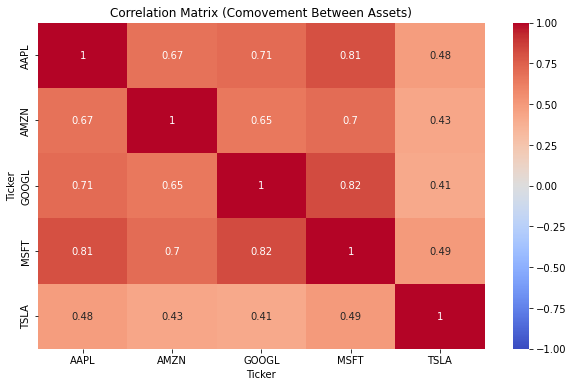

<AxesSubplot:xlabel='Date'>

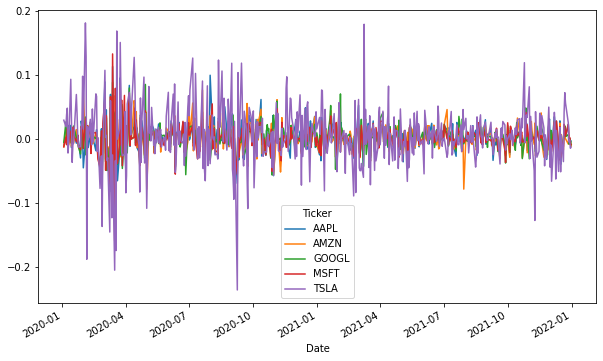

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

data = yf.download(tickers, start='2020-01-01', end='2022-01-01')['Adj Close']

returns = np.log(data / data.shift(1)).dropna()

if isinstance(returns.columns, pd.MultiIndex):
    returns.columns = returns.columns.get_level_values(0) 
correlation_matrix = returns.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Comovement Between Assets)')
plt.show()

returns.plot(figsize=(10, 6))


### Statistical Dependency and its Role in Trading

**Correlation as a Measure of Dependency**:
Correlation is a simple and common method for quantifying comovement between assets by measuring their linear relationship. However, it has limitations:
- **Linear Assumption**: Correlation only captures linear relationships, so non-linear dependencies may not be fully reflected.
- **Static**: Correlation assumes relationships between assets remain constant over time, which is not always true, especially during market crises or changing conditions.

**Beyond Correlation: More Advanced Measures**:
- **Covariance**: Focuses on absolute movements between assets, but it lacks normalization, unlike correlation.
- **Copulas**: Useful for capturing **tail dependencies**, where extreme movements in one asset affect others, particularly under market stress.
- **Cointegration**: This method detects long-term equilibrium relationships between non-stationary assets, even when their short-term movements may diverge. It is particularly useful in pairs trading and other arbitrage strategies.

**Importance of Choosing the Right Method**:
Understanding comovement is crucial for strategies like **pairs trading** and **portfolio diversification**. Simple correlation might miss important signals, especially in non-linear or time-varying relationships. More robust measures, such as **copulas**, **cointegration**, and **dynamic conditional correlation (DCC)** models, are essential for capturing complex dependencies accurately.

**Challenges in Statistical Dependency**:
- **Non-Linearity**: Many asset relationships are non-linear, making correlation an inadequate measure in such cases.
- **Time-Varying**: Correlations can shift, especially during periods of high volatility or crises, sometimes referred to as “correlation breakdown.”
- **Tail Dependencies**: In extreme market events, normally uncorrelated assets may suddenly move together, revealing hidden dependencies.


Comovement plays a vital role in trading and risk management. While correlation is a widely-used metric, its limitations make more advanced methods necessary when dealing with non-linear or time-varying dependencies. Approaches like **copulas** (for tail dependencies), **cointegration**, and **DCC models** are essential for more accurate insights in trading strategies such as pairs trading and portfolio optimization.

For more details, refer to the following resources:
1. [Lecture 07: Introduction to Statistical Dependence and Copulas for Finance](https://github.com/AliHabibnia/CMDA_4984_Data_Science_for_Quantitative_Finance/blob/main/Lecture%2007_Introduction%20to%20Statistical%20Dependence%20and%20Copulas%20for%20Finance.ipynb)
2. [Temporal Evolution of Financial Market Correlations](https://arxiv.org/pdf/1011.3225)
3. [Essays in High-Dimensional Nonlinear Time Series Analysis](https://etheses.lse.ac.uk/3485/)


<blockquote style="background-color:#e6f7ff; padding: 15px; border-left: 5px solid #1e90ff;">

### Note on Model Assumptions
Regardless of whether you're using mathematical or statistical approaches in financial modeling, it is essential to recognize that all models and methods rely on key assumptions. These assumptions are foundational to the models’ functionality, and ignoring or misunderstanding them can lead to significant errors in interpretation and decision-making.

In mathematical models (such as those based on stochastic calculus), assumptions about market efficiency, randomness, and the behavior of prices (e.g., the Geometric Brownian Motion for asset prices) are critical. These models often assume that markets are efficient and follow a particular stochastic process, where prices are not predictable from past data. For instance, they typically assume constant drift and volatility, and that random shocks (represented by a Wiener process) are normally distributed.

In statistical and data-driven models, assumptions often center around the data itself, such as the stationarity of returns, the distribution of error terms, and the relationship between variables. These models may assume weak forms of market efficiency, where some historical data can help predict future price movements, but often rely on the assumption that market inefficiencies are small and short-lived.
</blockquote>